In [1]:
!pip install ctgan
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from ctgan import CTGAN 

import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset=pd.read_csv('https://raw.githubusercontent.com/mahayasa/gan-hybrid-sampling-customer-churn/main/data/internetservice-churn.csv')

#transform data into numeric value
dataset = dataset.fillna(dataset.mean())

dataset=dataset.drop(['id'],axis=1)

df=dataset[dataset['churn']==1]
df1=dataset[dataset['churn']==0]


batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df1)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'mi

Epoch 1, Loss G: -0.0930,Loss D: -0.0925
Epoch 2, Loss G: -0.3443,Loss D: -0.1862
Epoch 3, Loss G: -0.6737,Loss D: -0.2103
Epoch 4, Loss G: -1.0605,Loss D: -0.3079
Epoch 5, Loss G: -1.2938,Loss D: -0.1392
Epoch 6, Loss G: -1.3756,Loss D: -0.0049
Epoch 7, Loss G: -1.3581,Loss D: -0.0835
Epoch 8, Loss G: -1.4418,Loss D:  0.0753
Epoch 9, Loss G: -1.3862,Loss D:  0.1258
Epoch 10, Loss G: -1.1213,Loss D: -0.0547
Epoch 11, Loss G: -0.9723,Loss D: -0.0775
Epoch 12, Loss G: -1.0261,Loss D:  0.0633
Epoch 13, Loss G: -1.0752,Loss D:  0.1730
Epoch 14, Loss G: -1.0633,Loss D:  0.1082
Epoch 15, Loss G: -1.0790,Loss D:  0.0123
Epoch 16, Loss G: -1.2076,Loss D:  0.0570
Epoch 17, Loss G: -1.4137,Loss D:  0.1209
Epoch 18, Loss G: -1.4532,Loss D:  0.0861
Epoch 19, Loss G: -1.4259,Loss D: -0.0415
Epoch 20, Loss G: -1.4548,Loss D: -0.0152
Epoch 21, Loss G: -1.4501,Loss D:  0.0392
Epoch 22, Loss G: -1.3984,Loss D: -0.0187
Epoch 23, Loss G: -1.2824,Loss D: -0.0405
Epoch 24, Loss G: -1.3892,Loss D:  0.0383
E

In [4]:
df1

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.400000,2.300000,0,0
5,1,1,11.94,32,1.38,0,69.400000,4.000000,0,0
11,1,1,11.93,10,1.28,0,10.600000,0.600000,0,0
15,1,1,11.93,18,1.80,0,1.000000,0.000000,0,0
16,1,0,11.93,22,0.01,1,10.600000,2.400000,0,0
...,...,...,...,...,...,...,...,...,...,...
71835,1,0,0.00,0,1.87,0,43.689911,4.192076,0,0
71836,1,1,0.00,0,1.97,0,43.689911,4.192076,0,0
71837,1,1,0.00,0,1.97,0,43.689911,4.192076,0,0
71838,1,1,0.00,0,1.97,0,43.689911,4.192076,0,0


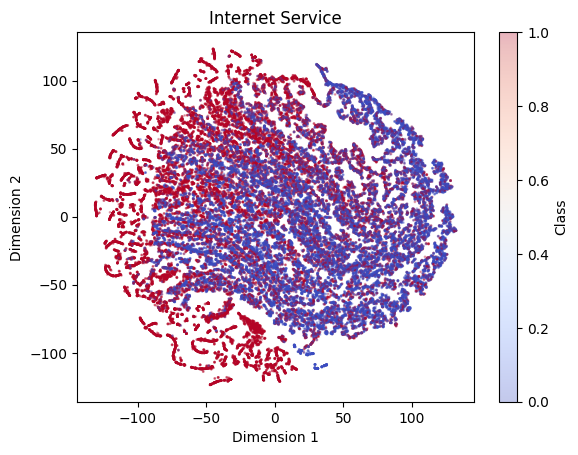

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = dataset.drop(['churn'], axis=1)
labels = dataset['churn']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Internet Service')
plt.colorbar(label='Class')
plt.show()

In [7]:
n_generated_data = 7862
generated_df = model.sample(n_generated_data)

In [18]:
#concat original data and gan data
data_concat = pd.concat([df1, generated_df])
# combine data churn and not churn
data=pd.concat([df, data_concat])
data = data.fillna(dataset.mean())
data

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,0,0,8.220000,0,0.716039,0,0.000000,0.000000,0,1
2,1,0,8.910000,16,0.000000,0,13.700000,0.900000,0,1
3,0,0,6.870000,21,0.716039,1,0.000000,0.000000,0,1
4,0,0,6.390000,0,0.716039,0,0.000000,0.000000,0,1
6,0,0,8.960000,18,0.000000,0,21.300000,2.000000,0,1
...,...,...,...,...,...,...,...,...,...,...
7857,1,0,1.601438,9,1.625491,0,29.329805,8.391047,0,0
7858,1,0,1.129346,9,2.033814,0,187.372438,3.576906,0,0
7859,1,0,4.727426,19,1.669646,0,26.730080,2.603023,0,0
7860,1,1,2.422084,10,0.757137,1,70.229009,7.817893,0,0


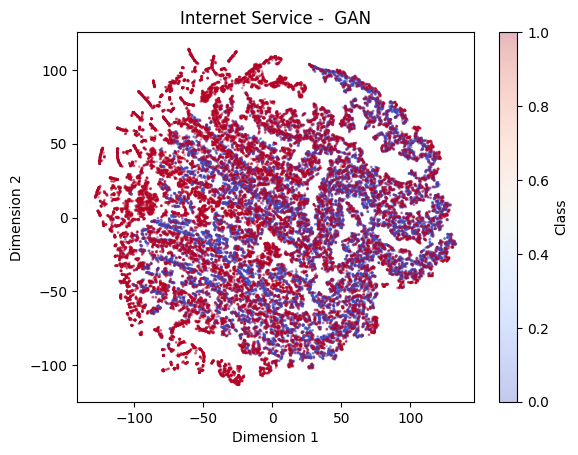

In [ ]:
features = data.drop(['churn'], axis=1)
labels = data['churn']

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Internet Service -  GAN')
plt.colorbar(label='Class')
plt.show()

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as mt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std


X=data.drop(['churn'],axis=1)
y=data["churn"]

#enn = EditedNearestNeighbours(n_neighbors=3)
#X, y = enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)
tomek_links = TomekLinks()
X, y = tomek_links.fit_resample(X, y)

#features = X
#labels =y

# Apply t-SNE for dimensionality reduction
#tsne = TSNE(n_components=2, random_state=42)
#embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
#plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
#plt.xlabel('Dimension 1')
#plt.ylabel('Dimension 2')
#plt.title('Internet Service -  GAN+ENN')
#plt.colorbar(label='Class')
#plt.show()


In [30]:

#kfold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)


#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier(colsample_bytree=0.6, max_depth = 5, gamma=1.5, min_child_weight=5)

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

===============XGBoost Performance====================
F1 score: 0.951
STD F1 Score: 0.001
Recall: 0.935
Specitifity: 0.582
AUC ROC: 0.982
G-Mean: 0.737


In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators =100, criterion = 'gini', random_state = 0)

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

===============Random Forest Performance====================
F1 score: 0.950
STD F1 Score: 0.001
Recall: 0.934
Specitifity: 0.580
AUC ROC: 0.982
G-Mean: 0.736


In [29]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

===============ADABoost Performance====================
F1 score: 0.945
STD F1 Score: 0.001
Recall: 0.931
Specitifity: 0.948
AUC ROC: 0.965
G-Mean: 0.940
